In [ ]:
import pandas as pd

# Define the Protein Language Models (PLMs) Dataset

In [ ]:
# Define a list of PLMs with key properties
models = [
    {"name": "MULAN", "parameters": 100e6, "input": ["sequence", "structure"], "output": "structure", "data": ["PDB", "AlphaFold", "Pfam"], "efficiency": 4},
    {"name": "PoET-2", "parameters": 182e6, "input": ["sequence", "structure", "evolution"], "output": "structure", "data": ["PDB", "STRING", "GO"], "efficiency": 5},
    {"name": "DPLM-2", "parameters": 200e6, "input": ["sequence", "structure"], "output": "structure", "data": ["PDB", "BindingDB", "InterPro"], "efficiency": 4},
    {"name": "Evola", "parameters": 80e9, "input": ["sequence", "evolution"], "output": "function", "data": ["UniProt", "Pfam"], "efficiency": 2},
]

# Convert list to DataFrame
df = pd.DataFrame(models)

# Display the dataset
df


,name,parameters,input,output,data,efficiency
0,MULAN,1.000000e+08,"[sequence, structure]",structure,"[PDB, AlphaFold, Pfam]",4
1,PoET-2,1.820000e+08,"[sequence, structure, evolution]",structure,"[PDB, STRING, GO]",5
2,DPLM-2,2.000000e+08,"[sequence, structure]",structure,"[PDB, BindingDB, InterPro]",4
3,Evola,8.000000e+10,"[sequence, evolution]",function,"[UniProt, Pfam]",2


#Define the ABUS Scoring System

In [ ]:
# Define scoring criteria weights
weights = {
    "adaptability": 0.2,  # Can it fine-tune easily?
    "usability": 0.15,  # How easy is it to use?
    "efficiency": 0.2,  # Model size + hardware efficiency
    "data_relevance": 0.25,  # Does it use the right biological data?
    "biological_task_fit": 0.2,  # Does it match our prediction task?
}


In [ ]:
# Function to calculate ABUS score
def score_model(model):
    # Adaptability (does it use structure & evolution inputs?)
    adaptability = 5 if "structure" in model["input"] and "evolution" in model["input"] else 3

    # Usability (small models score higher)
    usability = 5 if model["parameters"] < 300e6 else 2

    # Efficiency (predefined in dataset)
    efficiency = model["efficiency"]

    # Data relevance (does it use PDB + evolutionary sources like STRING/Pfam?)
    data_relevance = 5 if "PDB" in model["data"] and ("STRING" in model["data"] or "Pfam" in model["data"]) else 3

    # Biological task fit (is the output structure?)
    biological_task_fit = 5 if model["output"] == "structure" else 2

    # Compute weighted ABUS score
    score = (
        adaptability * weights["adaptability"] +
        usability * weights["usability"] +
        efficiency * weights["efficiency"] +
        data_relevance * weights["data_relevance"] +
        biological_task_fit * weights["biological_task_fit"]
    )

    return round(score, 2)


# Apply ABUS Scoring to All Models

In [ ]:
# Compute ABUS scores for all models
df["ABUS_score"] = df.apply(score_model, axis=1)

# Sort models by highest ABUS score
df = df.sort_values(by="ABUS_score", ascending=False)

# Display the ranked models
df


,name,parameters,input,output,data,efficiency,ABUS_score
1,PoET-2,1.820000e+08,"[sequence, structure, evolution]",structure,"[PDB, STRING, GO]",5,5.00
0,MULAN,1.000000e+08,"[sequence, structure]",structure,"[PDB, AlphaFold, Pfam]",4,4.40
2,DPLM-2,2.000000e+08,"[sequence, structure]",structure,"[PDB, BindingDB, InterPro]",4,3.90
3,Evola,8.000000e+10,"[sequence, evolution]",function,"[UniProt, Pfam]",2,2.45


#Visualizing the Results

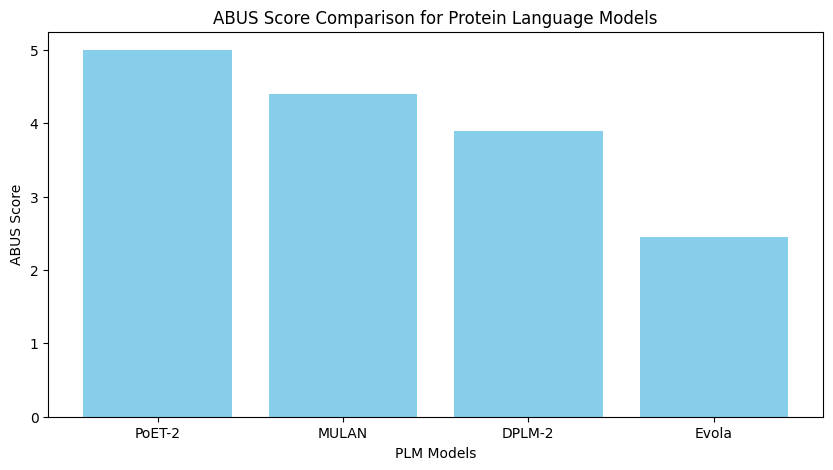

In [ ]:
import matplotlib.pyplot as plt

# Plot ABUS scores
plt.figure(figsize=(10, 5))
plt.bar(df["name"], df["ABUS_score"], color="skyblue")
plt.xlabel("PLM Models")
plt.ylabel("ABUS Score")
plt.title("ABUS Score Comparison for Protein Language Models")
plt.show()


#Running a Custom Query

In [ ]:
# Example: Find the best small model for structure prediction
query = df[(df["parameters"] < 300e6) & (df["output"] == "structure")]
query


,name,parameters,input,output,data,efficiency,ABUS_score
1,PoET-2,182000000.0,"[sequence, structure, evolution]",structure,"[PDB, STRING, GO]",5,5.0
0,MULAN,100000000.0,"[sequence, structure]",structure,"[PDB, AlphaFold, Pfam]",4,4.4
2,DPLM-2,200000000.0,"[sequence, structure]",structure,"[PDB, BindingDB, InterPro]",4,3.9
